# Projet 7  : Implémentez un modèle de scoring

## Résumée

Nous travaillons pour une société financière nommait "Prêt à dépenser" qui propose des crédits à la consommation pour des personnes ayant peu ou pas du tout d'historique de prêt. L’entreprise souhaite mettre en œuvre un outil de “scoring crédit” pour calculer la probabilité qu’un client rembourse son crédit, puis classifie la demande en crédit accordé ou refusé. Il faudra développer un algorithme de classification en s'appuyant sur des sources de données variées (données comportementales, données provenant d'autres institutions financières, etc.). <br>
Les clients sont de plus en plus demandeurs de transparence vis-à-vis des décisions d’octroi de crédit.<br>
Prêt à dépenser décide donc de développer un dashboard interactif pour que les chargés de relation client puissent à la fois expliquer de façon la plus transparente possible les décisions d’octroi de crédit, mais également permettre à leurs clients de disposer de leurs informations personnelles et de les explorer facilement.<br>
<br>
Notre mission :
- Construire un modèle de scoring qui donnera une prédiction sur la probabilité de faillite d'un client de façon automatique.
- Construire un dashboard interactif à destination des gestionnaires de la relation client permettant d'interpréter les prédictions faites par le modèle, et d’améliorer la connaissance client des chargés de relation client.

<br>
Spécifications du dashboard<br>
Michaël vous a fourni des spécifications pour le dashboard interactif. Celui-ci devra contenir au minimum les fonctionnalités suivantes :

- Permettre de visualiser le score et l’interprétation de ce score pour chaque client de façon intelligible pour une personne non experte en data science.
- Permettre de visualiser des informations descriptives relatives à un client (via un système de filtre).
- Permettre de comparer les informations descriptives relatives à un client à l’ensemble des clients ou à un groupe de clients similaires.

## Sommaire :
* [Importation des librairies de bases et des dataset](#chapter1)
* [Ouverture de fichier](#chapter2)
    * [Application train](#section_2_1)
    * [Application test](#section_2_2)
    * [Bureau](#section_2_3)
    * [Bureau balance](#section_2_4)
    * [Credit card balance](#section_2_5)
    * [Homecredit columns description](#section_2_6)
    * [Installments payments](#section_2_7)
    * [Pos Cash balance](#section_2_8)
    * [Previous application](#section_2_9)
    * [Sample submission](#section_2_10)
* [Fichier : application train](#chapter3)
* [Fusion 1 : Application train et Previous application](#chapter4)
* [Fusion 2 : Application train et Pos_Cash](#chapter5)
* [Fusison 3 : Application train et Credit](#chapter6)
* [Fusion 4 : Application train et Bureau](#chapter7)

## Importation des librairies de bases et des dataset <a class="anchor" id="chapter1"></a>

In [1]:
#Importation des librairies de bases
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importation des librairies de sklearn
from sklearn import datasets, preprocessing, model_selection, ensemble, pipeline

# Mes fonctions
from P7_05_function import *

import warnings
warnings.filterwarnings("ignore")

## Ouverture de fichier <a class="anchor" id="chapter2"></a>

### Application train  <a class="anchor" id="section_2_1"></a>

Les deux tableaux suivant sont des jeux de données entraînés et à tester. Une ligne représente un prêt dans notre échantillon de données. Le jeu de donnée est dans un autre fichier, tous les fichiers (.csv) seront mis dans ce dossier.

In [2]:
app_train = pd.read_csv("data/application_train.csv")
app_train.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


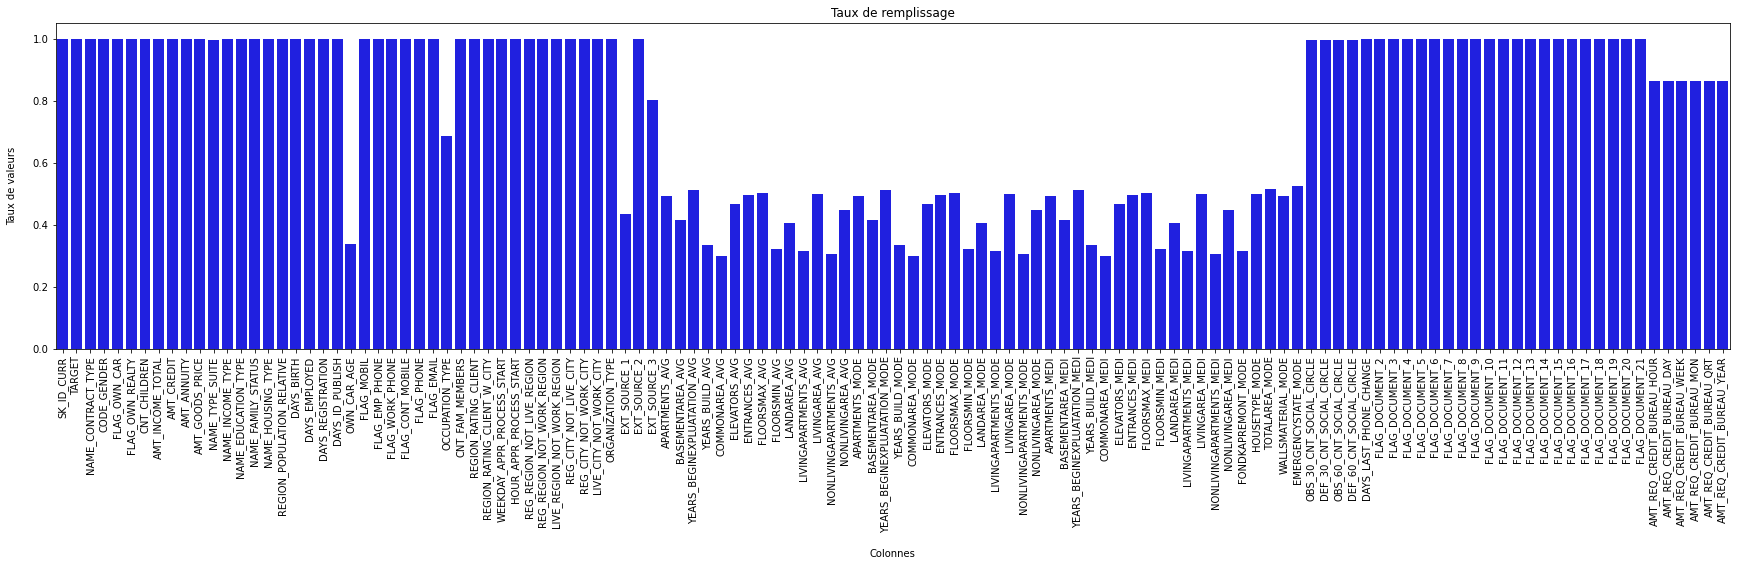

In [3]:
plt.rcParams["figure.figsize"] = (30, 6)
graphRemplissage(app_train)

### Application test  <a class="anchor" id="section_2_2"></a>

In [4]:
app_test = pd.read_csv("data/application_test.csv")
app_test.head(3)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0


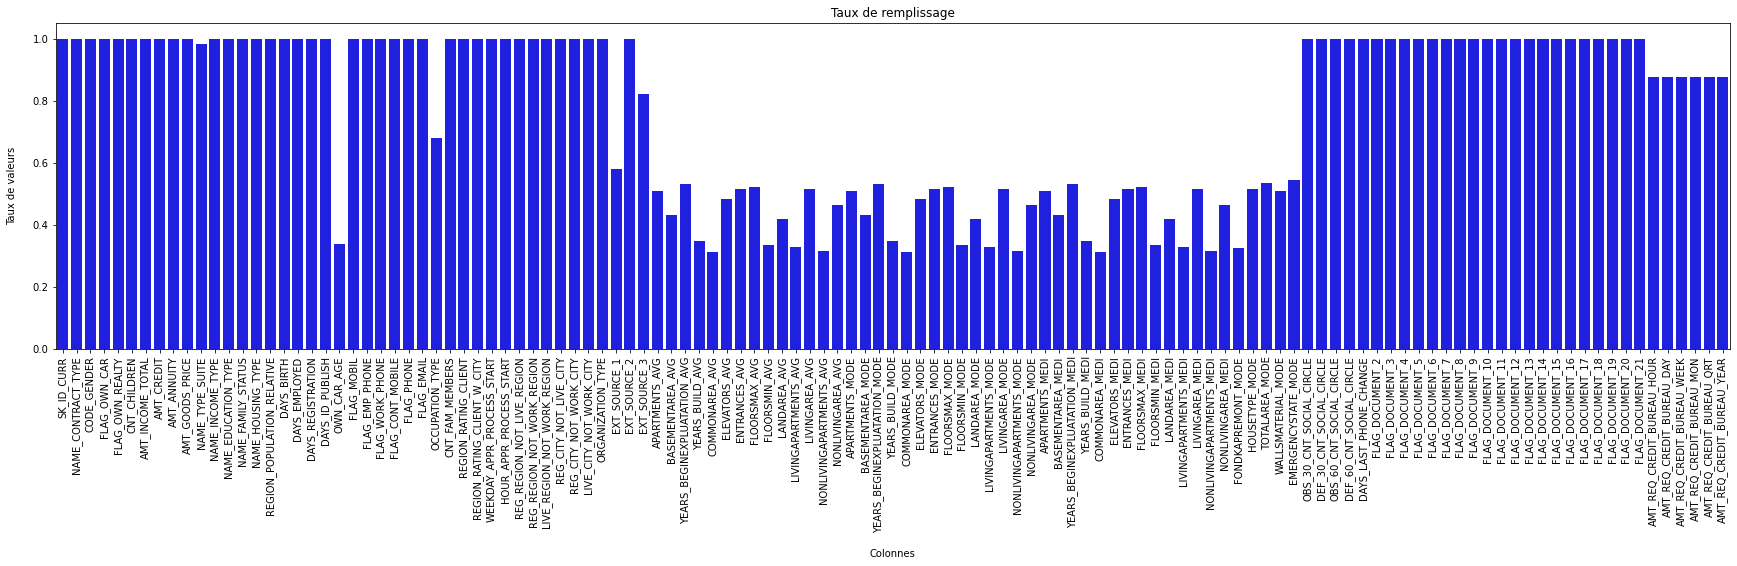

In [5]:
graphRemplissage(app_test)

On regarde plus en détail nos fichiers applications{train/test}

In [6]:
app_train.shape, app_test.shape

((307511, 122), (48744, 121))

On regarde les types de données et on peut voir que nous avons une colonne supplémentaire ("TARGET") qui se trouve dans le dataset "app_train" et pas dans "app_test".

In [7]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

### Bureau <a class="anchor" id="section_2_3"></a>

Tous les crédits antérieurs du client fournis par d'autres institutions financières qui ont été signalés au bureau de crédit (pour les clients qui ont un prêt dans notre échantillon).<br>
Pour chaque prêt de notre échantillon, il y a autant de lignes que le nombre de crédits que le client avait dans le Credit Bureau avant la date de la demande.

In [8]:
bureau = pd.read_csv("data/bureau.csv")
bureau.head(3)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN


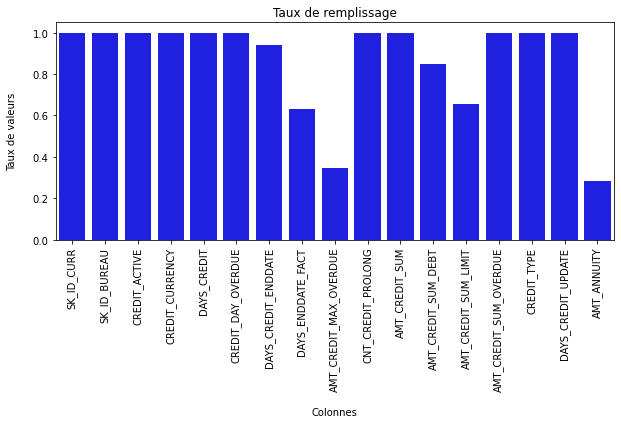

In [9]:
plt.rcParams["figure.figsize"] = (10, 4)
graphRemplissage(bureau)

### Bureau balance <a class="anchor" id="section_2_4"></a>

Soldes mensuels des crédits antérieurs au bureau de crédit. <br>
Ce tableau comporte une ligne pour chaque mois d'historique de chaque crédit précédent signalé au bureau de crédit.

In [10]:
bureau_balance = pd.read_csv("data/bureau_balance.csv")
bureau_balance.head(3)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C


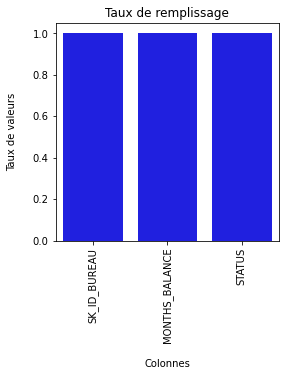

In [11]:
plt.rcParams["figure.figsize"] = (4, 4)
graphRemplissage(bureau_balance)

### Credit card balance <a class="anchor" id="section_2_5"></a>

Aperçus mensuels du solde des cartes de crédit précédentes que le demandeur a avec Home Credit.<br>
Ce tableau comporte une ligne pour chaque mois d'historique de chaque crédit précédent dans Home Credit (crédit à la consommation et prêts de trésorerie) lié aux prêts de notre échantillon

In [12]:
credit = pd.read_csv("data/credit_card_balance.csv")
credit.head(3)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0


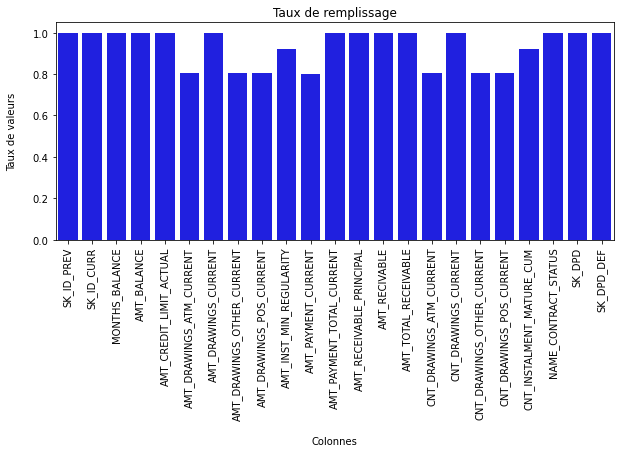

In [13]:
plt.rcParams["figure.figsize"] = (10, 4)
graphRemplissage(credit)

### Homecredit columns description <a class="anchor" id="section_2_6"></a>

Ce fichier contient les descriptions des colonnes des différents fichiers de données.

In [14]:
HomeCredit = pd.read_csv("data/HomeCredit_columns_description.csv", encoding= 'unicode_escape')
HomeCredit.head(3)

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN


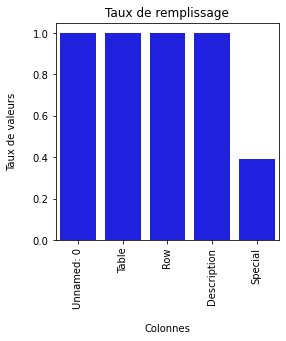

In [15]:
plt.rcParams["figure.figsize"] = (4, 4)
graphRemplissage(HomeCredit)

In [16]:
print("DOCUMENTATION :")
HomeCredit

DOCUMENTATION :


,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
214,217,installments_payments.csv,NUM_INSTALMENT_NUMBER,On which installment we observe payment,NaN
215,218,installments_payments.csv,DAYS_INSTALMENT,When the installment of previous credit was su...,time only relative to the application
216,219,installments_payments.csv,DAYS_ENTRY_PAYMENT,When was the installments of previous credit p...,time only relative to the application
217,220,installments_payments.csv,AMT_INSTALMENT,What was the prescribed installment amount of ...,NaN


### Installments payments <a class="anchor" id="section_2_7"></a>

Historique de remboursement des crédits précédemment décaissés en Home Credit liés aux prêts de notre échantillon.<br>
Il y a une ligne pour chaque paiement effectué plus une ligne pour chaque paiement manqué.<br>
Une ligne équivaut à un versement d'une échéance OU une échéance correspondant à un versement d'un précédent crédit immobilier lié aux prêts de notre échantillon.

In [17]:
install_pay = pd.read_csv("data/installments_payments.csv")
install_pay.head(3)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000


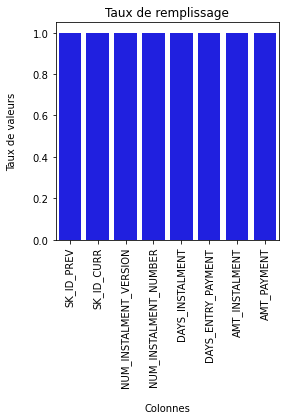

In [18]:
plt.rcParams["figure.figsize"] = (4, 4)
graphRemplissage(install_pay)

### Pos Cash balance <a class="anchor" id="section_2_8"></a>

Soldes mensuels instantannés des points de vente précédents et des prêts en espèces que le demandeur avait contractés avec Home Credit.<br>
Ce tableau a une ligne pour chaque mois d'historique de chaque crédit précédent dans Home Credit (crédit à la consommation et prêts de trésorerie) lié aux prêts de notre échantillon.

In [19]:
POS_CASH = pd.read_csv("data/POS_CASH_balance.csv")
POS_CASH.head(3)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0


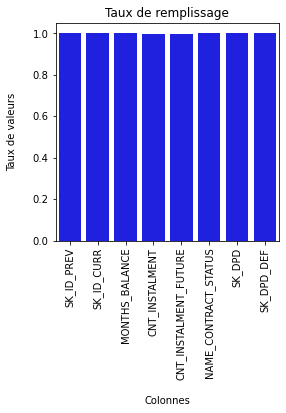

In [20]:
plt.rcParams["figure.figsize"] = (4, 4)
graphRemplissage(POS_CASH)

### Previous application <a class="anchor" id="section_2_9"></a>

Toutes les demandes précédentes de prêts immobiliers des clients qui ont des prêts dans notre échantillon.
Il y a une ligne pour chaque demande précédente liée aux prêts dans notre échantillon de données.

In [21]:
prev_appli = pd.read_csv("data/previous_application.csv")
prev_appli.head(3)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0


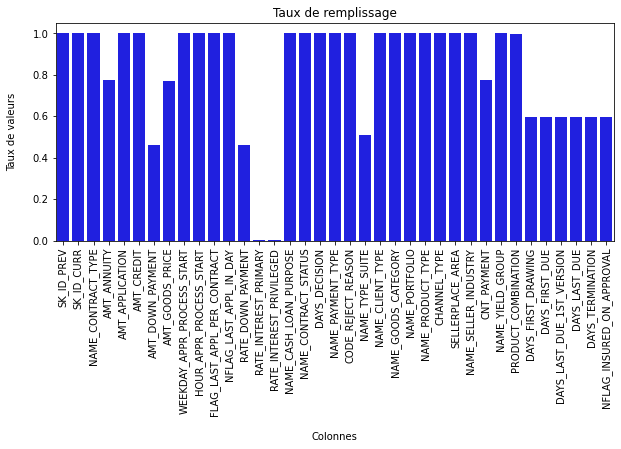

In [22]:
plt.rcParams["figure.figsize"] = (10, 4)
graphRemplissage(prev_appli)

### Sample submission <a class="anchor" id="section_2_10"></a>

In [23]:
sample_sub = pd.read_csv("data/sample_submission.csv")
sample_sub.head(3)

,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5
2,100013,0.5


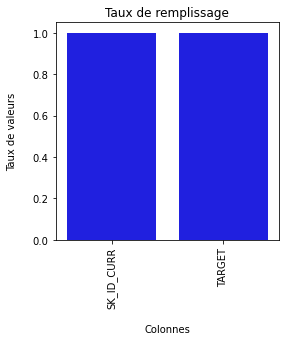

In [24]:
plt.rcParams["figure.figsize"] = (4, 4)
graphRemplissage(sample_sub)

## Fichier : application train <a class="anchor" id="chapter3"></a>

On regarde la répartition de la valeur "TARGET". Cette valeur possède deux valeurs : 0 pour un client qui n'est pas en difficulté et 1 client en difficulté.<br>
Avec ce graphique, on peut voir que les clients en écrasante majorité ne sont pas en difficultés..

Text(0.5, 1.0, 'Répartion de la valeur TARGET')

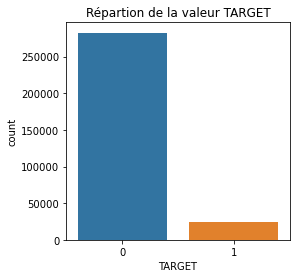

In [25]:
plt.rcParams["figure.figsize"] = (4, 4)
sns.countplot(data = app_train, x = "TARGET")
plt.title("Répartion de la valeur TARGET")

On va regarder la répartition du genre.<br>
Avec ce graphique, on peut voir que plus de femmes demandent de prêts.

Text(0.5, 1.0, 'Répartition du genre')

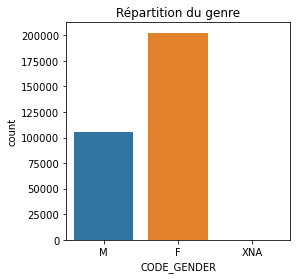

In [26]:
sns.countplot(data = app_train, x = "CODE_GENDER")
plt.title("Répartition du genre")

On va regarder le genre des demandeurs et regarder qui est en difficultés.<br>
Avec le graphique du dessus, on avait vu que les femmes faisaient le plus de prêts et donc on peut voir que la majorité des clientes n'ont pas de problèmes. Les clients en difficultés ne représentent pas un genre en particulier.

Text(0.5, 1.0, 'Répartition du genre par rapport à la valeur TARGET')

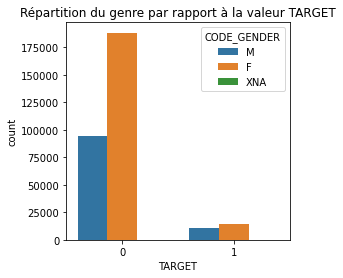

In [27]:
sns.countplot(data = app_train, x = 'TARGET', hue = "CODE_GENDER")
plt.title("Répartition du genre par rapport à la valeur TARGET")

Ensuite, on va regarder le nombre de client qui possède un bien immobilier et on peut constater que beaucoup ont déjà un bien immobillier et en majorité les femmes.

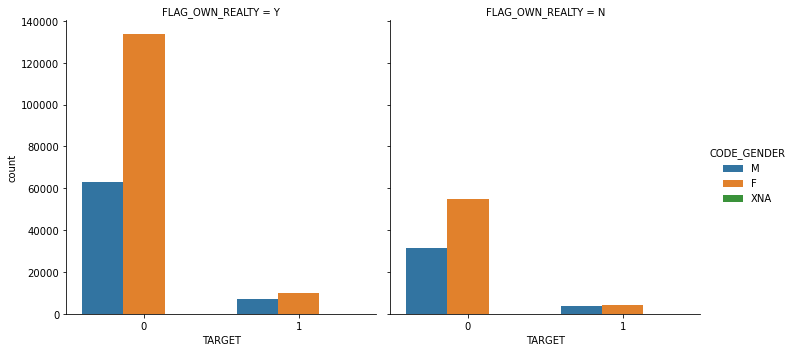

In [28]:
sns.catplot(data = app_train, x = 'TARGET', hue = "CODE_GENDER", col = 'FLAG_OWN_REALTY', kind="count")

On va regarder le type de contrat que le client à souscrit (prêt/renouveller) et séparer les clients en difficultés et voir si il possède un bien immobilier. On peut voir que beaucoup font un prêt et qui ont un bien immobilier et ceux qui possèdent pas de bien immobiler ont pris un prêt.

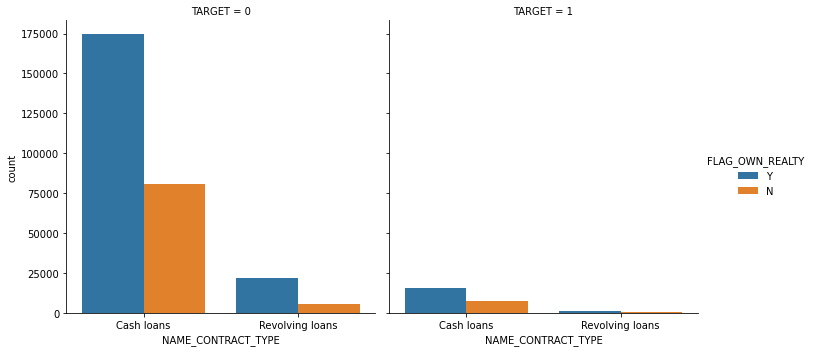

In [29]:
sns.catplot(data = app_train, col = 'TARGET', x = "NAME_CONTRACT_TYPE", hue = "FLAG_OWN_REALTY", kind="count")

Text(0.5, 1.0, 'Note des régions (1,2,3) ou le client vit')

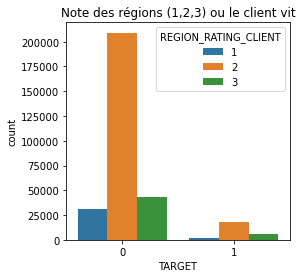

In [30]:
sns.countplot(data = app_train, x = 'TARGET', hue = "REGION_RATING_CLIENT")
plt.title("Note des régions (1,2,3) ou le client vit")

Pourcentage de la population ayant des diplômes

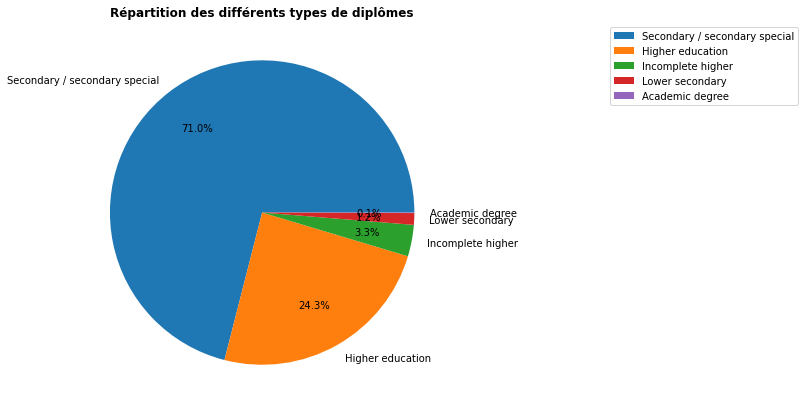

In [31]:
# En commentaire, le graphioque interractive qui ne marche pas sur github, ni en html

# import plotly.express as px
# import plotly.graph_objs as go
# from plotly.offline import iplot
# import plotly.io as pio

# pie = go.Figure(data=[go.Pie(labels = app_train['NAME_EDUCATION_TYPE'].value_counts().keys(),
#                              values = app_train['NAME_EDUCATION_TYPE'].value_counts().values)])

# pie.update_layout(autosize=False, width=500, height=400,)
# pie.update_traces(marker=dict(line=dict(width=2)))
# pie.update_layout(title="Répartition des différents types de diplômes")

# pie.show()

plt.rcParams["figure.figsize"] = (7,7)
plt.pie(app_train['NAME_EDUCATION_TYPE'].value_counts().values, 
        labels = app_train['NAME_EDUCATION_TYPE'].value_counts().keys(),
        autopct='%1.1f%%', pctdistance = 0.7)
plt.legend(bbox_to_anchor=(1.4, 1.0), loc='upper left')
plt.title("Répartition des différents types de diplômes", fontsize=12,fontweight = 'bold')
plt.show()

Text(0.5, 1.0, 'Répartition des différents types de diplômes selon les TARGET')

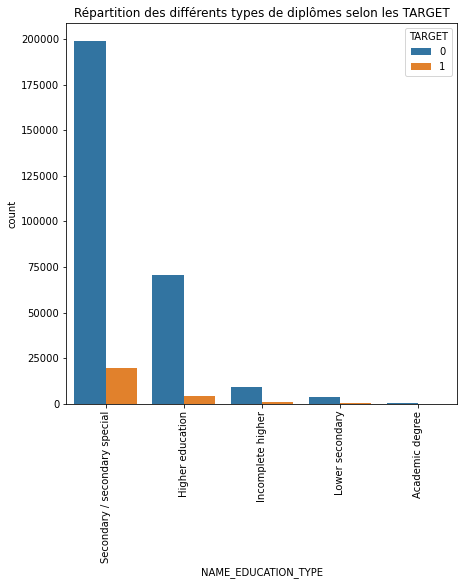

In [32]:
sns.countplot(data = app_train, x = 'NAME_EDUCATION_TYPE', hue = 'TARGET',
            order = app_train['NAME_EDUCATION_TYPE'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Répartition des différents types de diplômes selon les TARGET")

La majorité des clients qui demandent des prêts n'ont pas d'enfants.

Text(0.5, 1.0, 'Nombre enfant par clients')

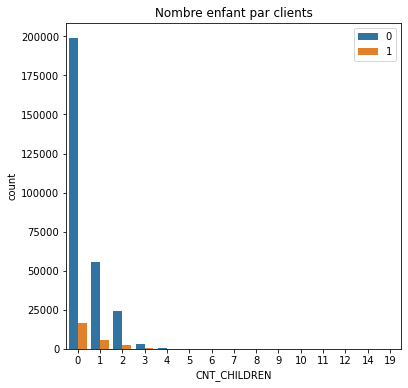

In [33]:
plt.rcParams["figure.figsize"] = (6, 6)
sns.countplot(data = app_train, x = "CNT_CHILDREN", hue = 'TARGET')
plt.legend(loc='upper right')
plt.title("Nombre enfant par clients")

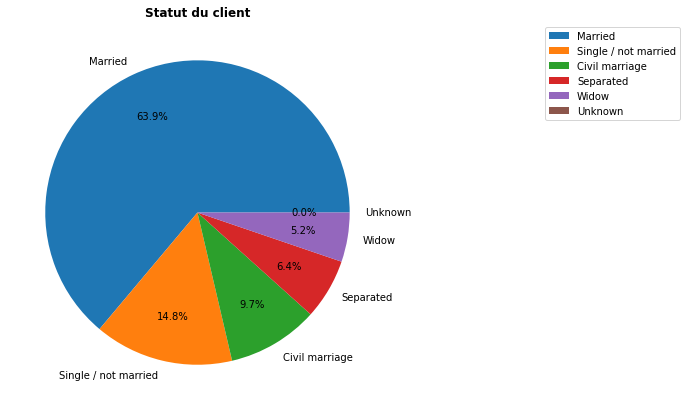

In [34]:
# pie = go.Figure(data=[go.Pie(labels = app_train['NAME_FAMILY_STATUS'].value_counts().keys(),
#                              values = app_train['NAME_FAMILY_STATUS'].value_counts().values)])

# pie.update_layout(autosize=False, width=500, height=400,)
# pie.update_traces(marker=dict(line=dict(width=2)))
# pie.update_layout(title="Statut du client")
# iplot(pie)

plt.rcParams["figure.figsize"] = (7,7)
plt.pie(app_train['NAME_FAMILY_STATUS'].value_counts().values, 
        labels = app_train['NAME_FAMILY_STATUS'].value_counts().keys(),
        autopct='%1.1f%%', pctdistance = 0.7)
plt.legend(bbox_to_anchor=(1.4, 1.0), loc='upper left')
plt.title("Statut du client", fontsize=12,fontweight = 'bold')
plt.show()

Text(0.5, 1.0, 'Situation du clients')

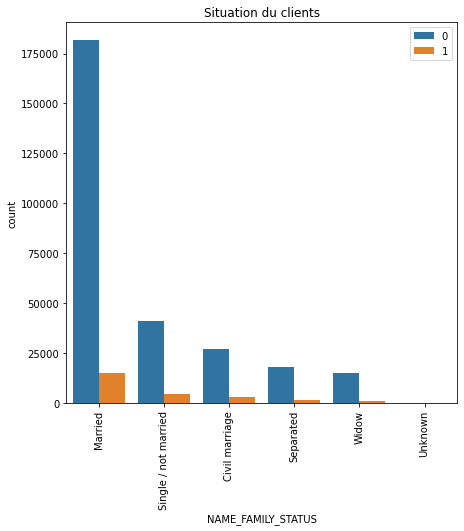

In [35]:
sns.countplot(data = app_train, x = 'NAME_FAMILY_STATUS', hue = 'TARGET',
                order = app_train['NAME_FAMILY_STATUS'].value_counts().index)
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.title("Situation du clients")

On va voir la répartition des prêts par genre et on peut constater que les prêts sont proches.

Text(0.5, 1.0, 'Boxplot sur les crédits par rapport au genre et au TARGET')

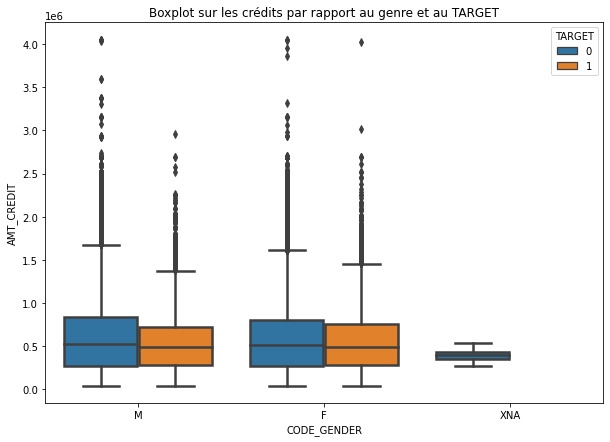

In [36]:
plt.rcParams["figure.figsize"] = (10,7)
sns.boxplot(data = app_train, x = 'CODE_GENDER', y = 'AMT_CREDIT', 
                hue='TARGET', linewidth=2.5)
plt.title("Boxplot sur les crédits par rapport au genre et au TARGET")

Revenu du client, on supprime les outliers pour plus de visibilités.

Text(0.5, 1.0, 'Boxplot sur les revenus des clients par rapport au genre et au TARGET')

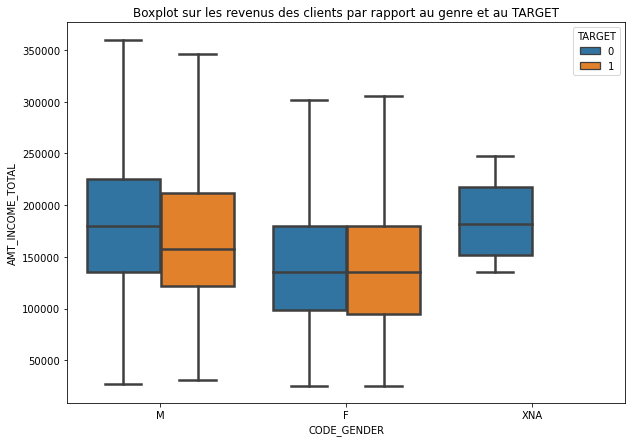

In [37]:
plt.rcParams["figure.figsize"] = (10,7)
sns.boxplot(data = app_train, x = 'CODE_GENDER', y = 'AMT_INCOME_TOTAL', 
                hue='TARGET', linewidth=2.5, showfliers=False)
plt.title("Boxplot sur les revenus des clients par rapport au genre et au TARGET")

On va afficher un camembert des métiers, pour les métiers qui sont peu représentés, on va les mettre dans la catégorie "Autres". On créait un dataframe, on fai la somme des lignes et on renomme la ligne à "Autres".<br>
Les valeurs "Autre" appartient :
- Unemployed
- Student
- Businessman
- Maternity leave 

In [38]:
df = pd.DataFrame()
df["labels"] = app_train['NAME_INCOME_TYPE'].value_counts().keys()
df["values"] = app_train['NAME_INCOME_TYPE'].value_counts().values
print("Ancien dataframe :")
print(df)
print("##################################################")
df[4:] = df[4:].sum()
df = df[:5]
df["labels"][4] = "Autres"
print("Nouveau dataframe :")
print(df)

Ancien dataframe :
                 labels  values
0               Working  158774
1  Commercial associate   71617
2             Pensioner   55362
3         State servant   21703
4            Unemployed      22
5               Student      18
6           Businessman      10
7       Maternity leave       5
##################################################
Nouveau dataframe :
                 labels  values
0               Working  158774
1  Commercial associate   71617
2             Pensioner   55362
3         State servant   21703
4                Autres      55


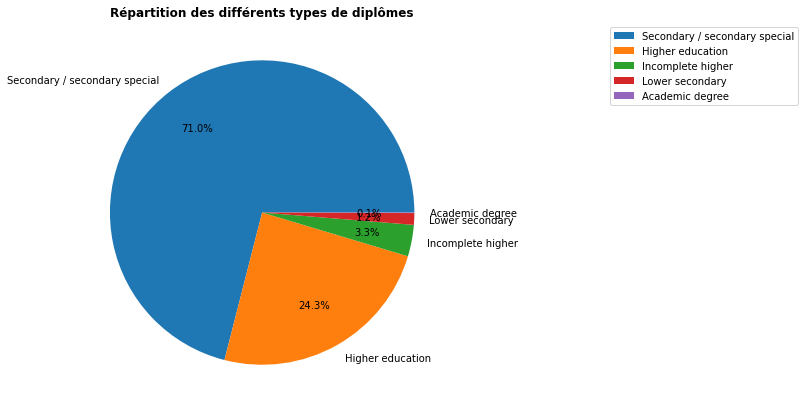

In [39]:
# pie = px.pie(names = app_train['NAME_EDUCATION_TYPE'].value_counts().keys(),
#         values = app_train['NAME_EDUCATION_TYPE'].value_counts().values,
#         title = "Répartition des différents types de diplômes")

# pie.update_layout(autosize=False, width=500, height=400,)
# pie.update_traces(marker=dict(line=dict(width=2)))
# iplot(pie)

plt.rcParams["figure.figsize"] = (7,7)
plt.pie(app_train['NAME_EDUCATION_TYPE'].value_counts().values, 
        labels = app_train['NAME_EDUCATION_TYPE'].value_counts().keys(),
        autopct='%1.1f%%', pctdistance = 0.7)
plt.legend(bbox_to_anchor=(1.4, 1.0), loc='upper left')
plt.title("Répartition des différents types de diplômes", fontsize=12,fontweight = 'bold')
plt.show()

Les différents métiers par rapport aux targets

Text(0.5, 1.0, 'Le type de métier par rapport au target')

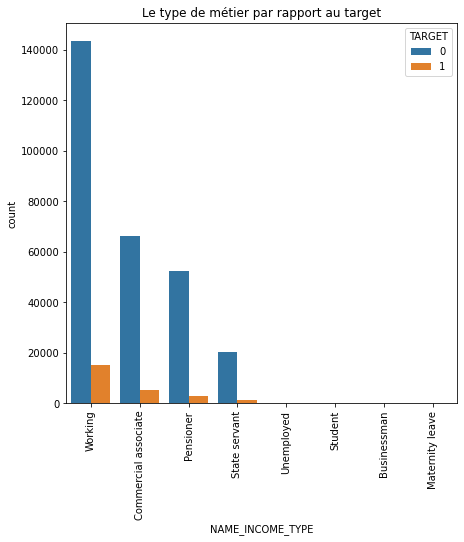

In [40]:
fig,ax = plt.subplots()
sns.countplot(data = app_train, hue = 'TARGET', x = 'NAME_INCOME_TYPE',
                order = app_train['NAME_INCOME_TYPE'].value_counts().index)
ax.tick_params(axis='x', rotation=90)
plt.title("Le type de métier par rapport au target")

Text(0.5, 1.0, 'Les types de catégories des clients')

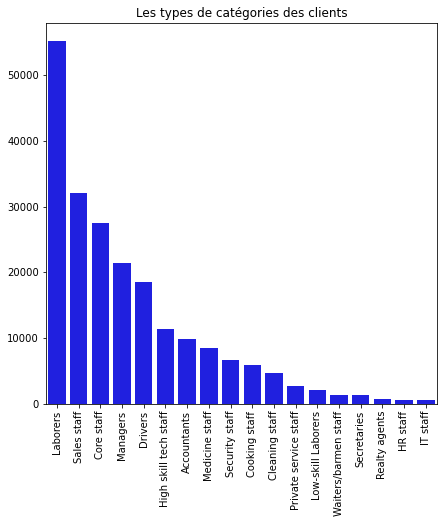

In [41]:
# fig = px.histogram(app_train, x="OCCUPATION_TYPE",
#                   barmode='group', text_auto='.2s', width=800, height=400).update_xaxes(categoryorder = "total descending")
# fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
# fig.update_layout(title="Les types de catégories des clients")
# fig.show()

df = app_train["OCCUPATION_TYPE"].value_counts()
df = pd.DataFrame(df)

fig,ax = plt.subplots()
sns.barplot(data = df.T, color = 'blue')
ax.tick_params(axis='x', rotation=90)
plt.title("Les types de catégories des clients")

Text(0.5, 1.0, 'Les types de catégories des clients par rapport aux TARGET')

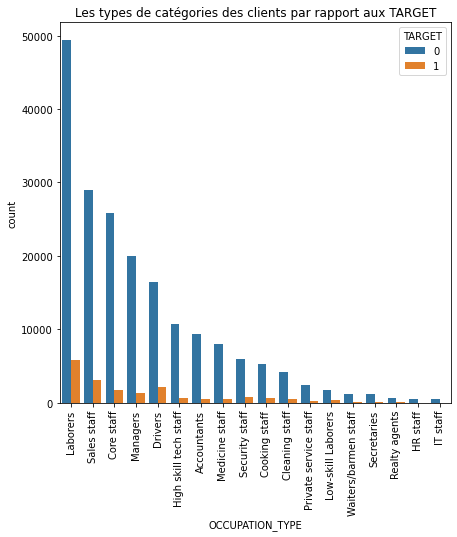

In [42]:
# fig = px.histogram(app_train, x="OCCUPATION_TYPE", 
#                    color="TARGET", barmode='group', width=800, height=400).update_xaxes(categoryorder = "total descending")
# fig.update_layout(title="Les types de catégories des clients par rapport aux TARGET")
# fig.show()

fig,ax = plt.subplots()
sns.countplot(data = app_train, x = "OCCUPATION_TYPE", hue = 'TARGET', order = app_train["OCCUPATION_TYPE"].value_counts().index)
ax.tick_params(axis='x', rotation=90)
plt.title("Les types de catégories des clients par rapport aux TARGET")

Text(0.5, 1.0, 'Les types de métiers des clients par rapport aux TARGET')

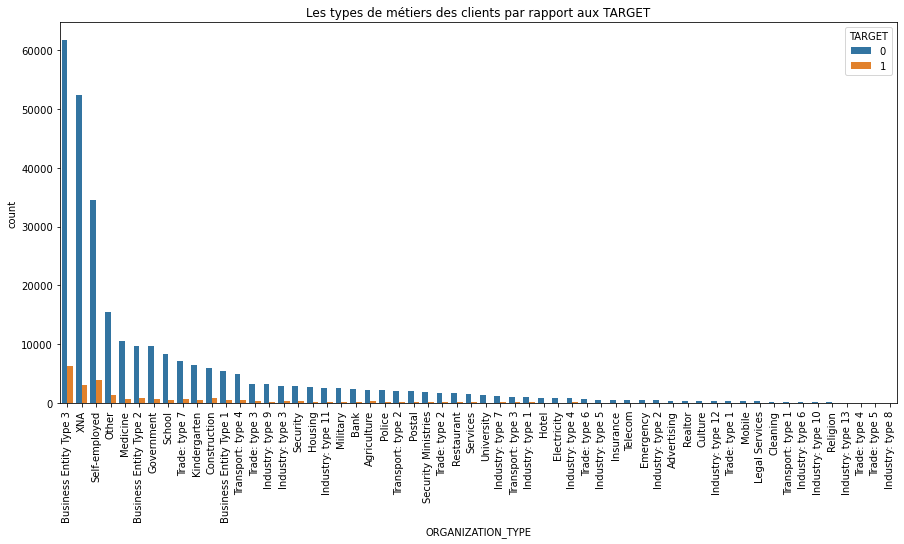

In [43]:
# fig = px.histogram(app_train, x="ORGANIZATION_TYPE", 
#                    color="TARGET", barmode='group', width=800, height=400).update_xaxes(categoryorder = "total descending")
# fig.update_layout(title="Les types de métiers des clients par rapport aux TARGET")
# fig.show()

plt.rcParams["figure.figsize"] = (15,7)
fig,ax = plt.subplots()
sns.countplot(data = app_train, x = "ORGANIZATION_TYPE", hue = 'TARGET', order = app_train["ORGANIZATION_TYPE"].value_counts().index)
ax.tick_params(axis='x', rotation=90)
plt.title("Les types de métiers des clients par rapport aux TARGET")

Text(0.5, 1.0, 'Boxplot sur le prix des biens pour lesquels le prêt est accordé par rapport au genre et au TARGET')

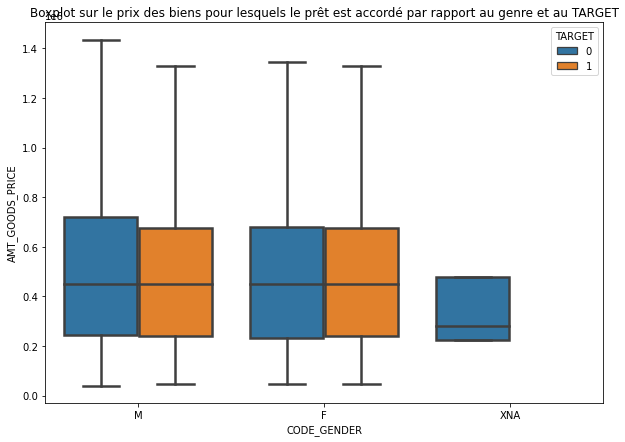

In [44]:
plt.rcParams["figure.figsize"] = (10,7)
sns.boxplot(data = app_train, x = 'CODE_GENDER', y = 'AMT_GOODS_PRICE', 
                hue='TARGET', linewidth=2.5, showfliers=False)
plt.title("Boxplot sur le prix des biens pour lesquels le prêt est accordé par rapport au genre et au TARGET")

Text(0.5, 1.0, 'Boxplot sur la rente demandé par rapport au genre et au TARGET')

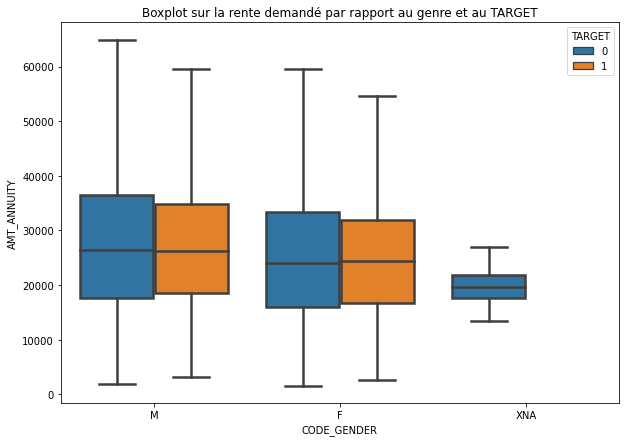

In [45]:
sns.boxplot(data = app_train, x='CODE_GENDER', y='AMT_ANNUITY', 
                hue='TARGET', linewidth=2.5, showfliers=False)
plt.title("Boxplot sur la rente demandé par rapport au genre et au TARGET")

## Fusion 1 : Application train et Previous application <a class="anchor" id="chapter4"></a>

In [46]:
join_1 = app_train.join(prev_appli, how='left', on='SK_ID_CURR', 
                                rsuffix='_previous')

join_1.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Connectivity,10.0,high,POS mobile with interest,365243.0,-2004.0,-1734.0,-1914.0,-1908.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Connectivity,12.0,low_normal,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,5.0,low_normal,POS mobile without interest,365243.0,-1308.0,-1188.0,-1188.0,-1181.0,0.0


Text(0.5, 1.0, 'Noms des statuts contrats')

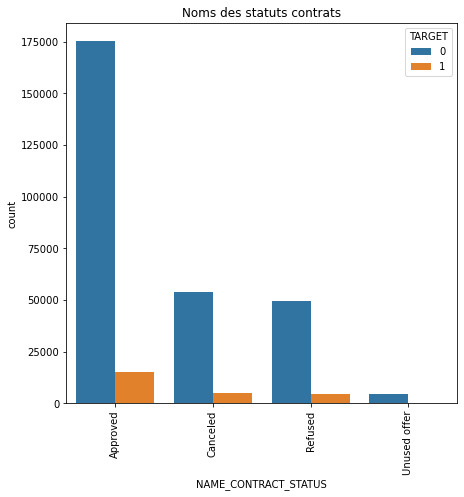

In [47]:
# plt.rcParams["figure.figsize"] = (7,7)
# fig = px.histogram(join_1, x="NAME_CONTRACT_STATUS",
#              color="TARGET", barmode='group', width=600, height=300).update_xaxes(categoryorder = "total descending")
# fig.update_layout(title="Noms des statuts contrats")
# fig.show()

plt.rcParams["figure.figsize"] = (7,7)
fig,ax = plt.subplots()
sns.countplot(data = join_1, x = "NAME_CONTRACT_STATUS", hue = 'TARGET', order = join_1["NAME_CONTRACT_STATUS"].value_counts().index)
ax.tick_params(axis='x', rotation=90)
plt.title("Noms des statuts contrats")

In [48]:
df = pd.DataFrame()
df["labels"] = join_1['CODE_REJECT_REASON'].value_counts().keys()
df["values"] = join_1['CODE_REJECT_REASON'].value_counts().values
print("Ancien dataframe :")
print(df)
print("##################################################")
df[4:] = df[5:].sum()
df = df[:6]
df["labels"][5] = "Autres"
print("Nouveau dataframe :")
print(df)

Ancien dataframe :
   labels  values
0     XAP  249031
1      HC   32257
2   LIMIT   10518
3     SCO    6805
4  CLIENT    4853
5   SCOFR    2333
6     XNA     956
7   VERIF     611
8  SYSTEM     147
##################################################
Nouveau dataframe :
                labels  values
0                  XAP  249031
1                   HC   32257
2                LIMIT   10518
3                  SCO    6805
4  SCOFRXNAVERIFSYSTEM    4047
5               Autres    4047


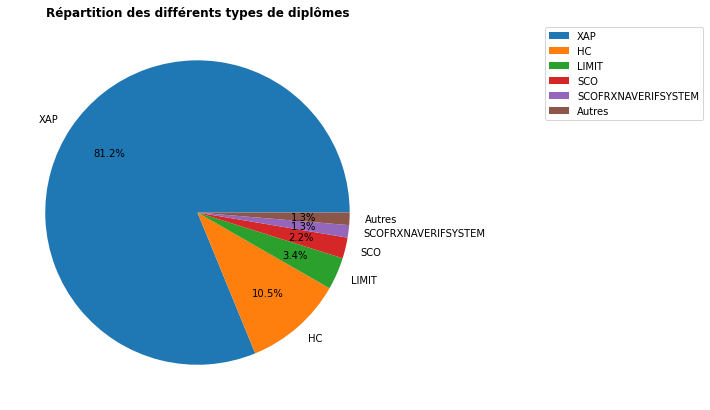

In [49]:
# pie = px.pie(df, values = df['values'],
#              names = df['labels'],
#              title = "Répartition des différents raisons de rejets")

# pie.update_layout(autosize=False, width=500, height=400,)
# pie.update_layout(title="Répartition des différents raisons de rejets")

# iplot(pie)

plt.rcParams["figure.figsize"] = (7,7)
plt.pie(df['values'], 
        labels = df['labels'],
        autopct='%1.1f%%', pctdistance = 0.7)
plt.legend(bbox_to_anchor=(1.4, 1.0), loc='upper left')
plt.title("Répartition des différents types de diplômes", fontsize=12,fontweight = 'bold')
plt.show()

Text(0.5, 1.0, 'Nombre de clients par motif de rejet et propriété immobilière')

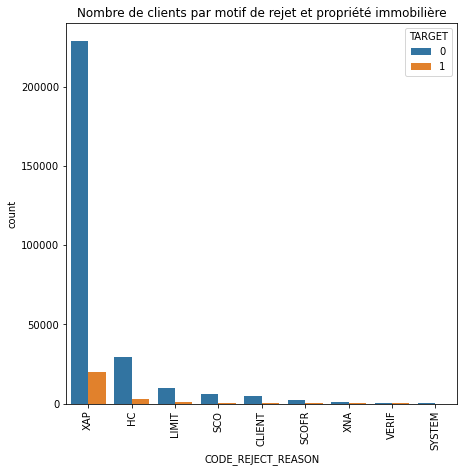

In [50]:
# fig = px.histogram(join_1, x="CODE_REJECT_REASON",
#              color="TARGET", barmode='group', width=600, height=300).update_xaxes(categoryorder = "total descending")

# fig.update_layout(title="Nombre de clients par motif de rejet et propriété immobilière")
# fig.show()

plt.rcParams["figure.figsize"] = (7,7)
fig,ax = plt.subplots()
sns.countplot(data = join_1, x = "CODE_REJECT_REASON", hue = 'TARGET', order = join_1["CODE_REJECT_REASON"].value_counts().index)
ax.tick_params(axis='x', rotation=90)
plt.title("Nombre de clients par motif de rejet et propriété immobilière")

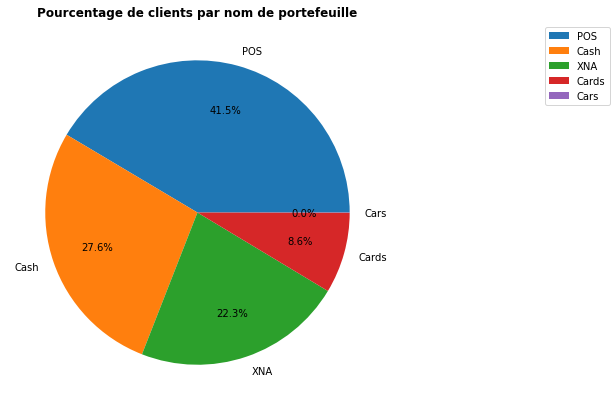

In [51]:
# pie = go.Figure(data=[go.Pie(labels = join_1['NAME_PORTFOLIO'].value_counts().keys(),
#                              values = join_1['NAME_PORTFOLIO'].value_counts().values)])

# pie.update_layout(autosize=False, width=450, height=450,)
# pie.update_layout(title="Pourcentage de clients par nom de portefeuille")

# iplot(pie)

plt.rcParams["figure.figsize"] = (7,7)
plt.pie(join_1['NAME_PORTFOLIO'].value_counts().values, 
        labels = join_1['NAME_PORTFOLIO'].value_counts().keys(),
        autopct='%1.1f%%', pctdistance = 0.7)
plt.legend(bbox_to_anchor=(1.4, 1.0), loc='upper left')
plt.title("Pourcentage de clients par nom de portefeuille", fontsize=12,fontweight = 'bold')
plt.show()

## Fusion 2 : Application train et Pos_Cash <a class="anchor" id="chapter5"></a>

In [52]:
join_2 = join_1.join(POS_CASH, how='left', on='SK_ID_CURR', 
                                rsuffix='_POS_CASH')
join_2.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,SK_ID_PREV_POS_CASH,SK_ID_CURR_POS_CASH,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS_POS_CASH,SK_DPD,SK_DPD_DEF
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-1908.0,0.0,2415125,200227,-32,12.0,12.0,Active,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,NaN,NaN,1659576,291776,-35,12.0,12.0,Active,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-1181.0,0.0,1480411,365683,-33,12.0,12.0,Active,0,0


Text(0.5, 1.0, 'Nombre de versements futurs par cible')

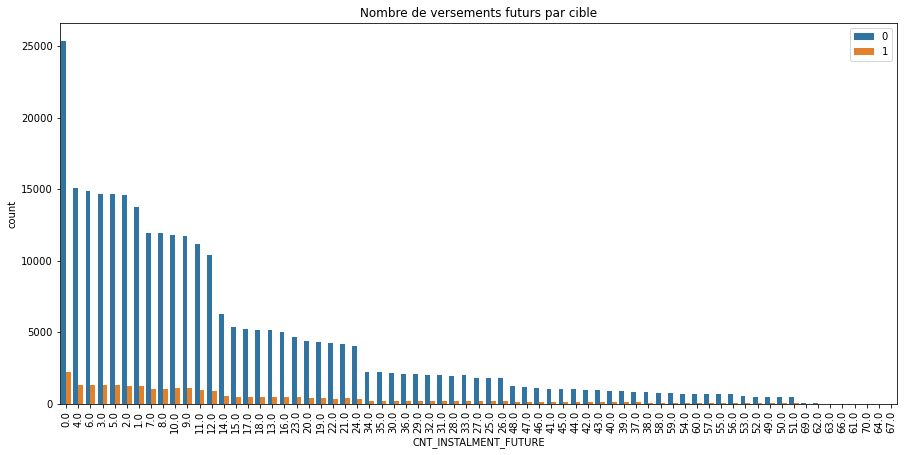

In [53]:
# fig = px.histogram(join_2, x="CNT_INSTALMENT_FUTURE", color="TARGET", barmode='group',
#                 width=650, height=350)

# fig.update_layout(title="Nombre de versements futurs par cible")
# fig.show()

plt.rcParams["figure.figsize"] = (15,7)
fig,ax = plt.subplots()
sns.countplot(data = join_2, x = "CNT_INSTALMENT_FUTURE", hue = 'TARGET', order = join_2["CNT_INSTALMENT_FUTURE"].value_counts().index)
ax.tick_params(axis='x', rotation=90)
plt.legend(loc='upper right')
plt.title("Nombre de versements futurs par cible")

Text(0.5, 1.0, 'Nombre de clients dans chaque classe cible par statut des noms de contrats')

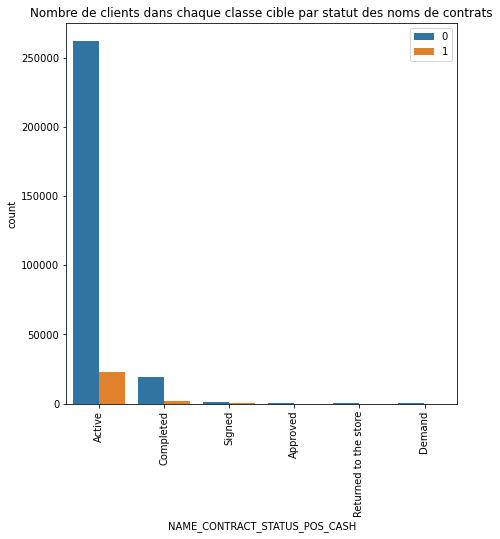

In [54]:
# fig = px.histogram(join_2, x="NAME_CONTRACT_STATUS_POS_CASH",
#              color="TARGET", barmode='group',width=650, height=350).update_xaxes(categoryorder = "total descending")
# fig.update_layout(title="Nombre de clients dans chaque classe cible par statut des noms de contrats")
# fig.show()

plt.rcParams["figure.figsize"] = (7,7)
fig,ax = plt.subplots()
sns.countplot(data = join_2, x = "NAME_CONTRACT_STATUS_POS_CASH", hue = 'TARGET',
                order = join_2["NAME_CONTRACT_STATUS_POS_CASH"].value_counts().index)
ax.tick_params(axis='x', rotation=90)
plt.legend(loc='upper right')
plt.title("Nombre de clients dans chaque classe cible par statut des noms de contrats")

## Fusison 3 : Application train et Credit <a class="anchor" id="chapter6"></a>

In [55]:
join_3 = join_2.join(credit, how='left', on='SK_ID_CURR', 
                                rsuffix='_credit')
join_3.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS_credit,SK_DPD_credit,SK_DPD_DEF_credit
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0,0.0,0.0,17.0,Active,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0


Text(0.5, 1.0, 'Nombre de clients dans chaque classe cible par statut des noms de contrats credit')

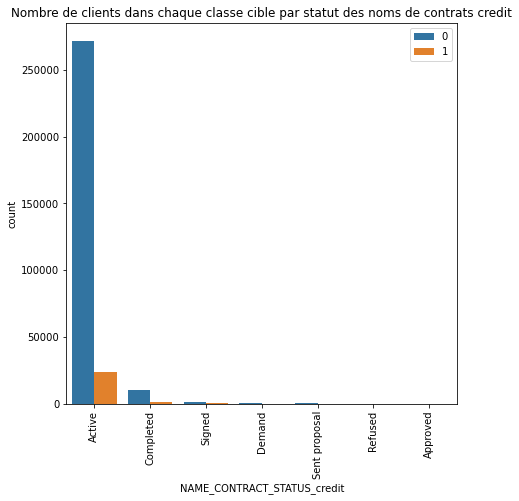

In [56]:
# fig = px.histogram(join_3, x="NAME_CONTRACT_STATUS_credit",
#              color="TARGET", barmode='group',width=650, height=350).update_xaxes(categoryorder = "total descending")
# fig.update_layout(title="Nombre de clients dans chaque classe cible par statut des noms de contrats credit")
# fig.show()

plt.rcParams["figure.figsize"] = (7,7)
fig,ax = plt.subplots()
sns.countplot(data = join_3, x = "NAME_CONTRACT_STATUS_credit", hue = 'TARGET',
                order = join_3["NAME_CONTRACT_STATUS_credit"].value_counts().index)
ax.tick_params(axis='x', rotation=90)
plt.legend(loc='upper right')
plt.title("Nombre de clients dans chaque classe cible par statut des noms de contrats credit")

## Fusion 4 : Application train et Bureau <a class="anchor" id="chapter7"></a>

In [57]:
join_4 = join_3.join(bureau, how='left', on='SK_ID_CURR', 
                                rsuffix='_bureau')
join_4.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY_bureau
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-2320.0,NaN,0,58590.99,0.0,NaN,0.0,Consumer credit,-762,12681.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-1090.0,NaN,0,91881.00,0.0,0.0,0.0,Consumer credit,-1085,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-1275.0,NaN,0,183829.50,0.0,0.0,0.0,Consumer credit,-1266,12681.0


Text(0.5, 1.0, 'Nombre de clients dans chaque classe cible par crédit actif')

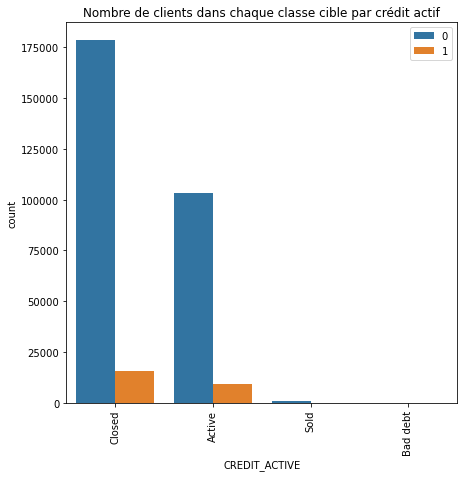

In [58]:
# fig = px.histogram(join_4, x="TARGET",color='CREDIT_ACTIVE',
#                   barmode='group', text_auto='.2s',width=650, height=350).update_xaxes(categoryorder = "total descending")
# fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
# fig.update_layout(title="Nombre de clients dans chaque classe cible par crédit actif")
# fig.show()

plt.rcParams["figure.figsize"] = (7,7)
fig,ax = plt.subplots()
sns.countplot(data = join_4, x = "CREDIT_ACTIVE", hue = 'TARGET',
                order = join_4["CREDIT_ACTIVE"].value_counts().index)
ax.tick_params(axis='x', rotation=90)
plt.legend(loc='upper right')
plt.title("Nombre de clients dans chaque classe cible par crédit actif")

Text(0.5, 1.0, 'Nombre de clients dans chaque classe cible par type de crédit')

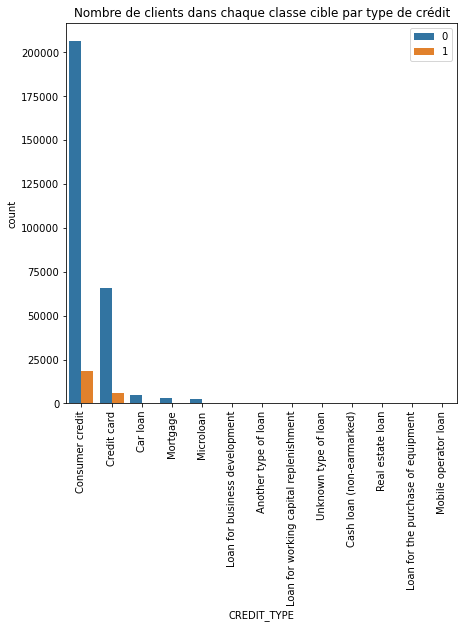

In [59]:
# fig = px.histogram(join_4, x="CREDIT_TYPE",
#                   barmode='group', text_auto='.2s',width=800, height=400).update_xaxes(categoryorder = "total descending")
# fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
# fig.update_layout(title="Nombre de clients dans chaque classe cible par type de crédit")
# fig.show()

plt.rcParams["figure.figsize"] = (7,7)
fig,ax = plt.subplots()
sns.countplot(data = join_4, x = "CREDIT_TYPE", hue = 'TARGET',
                order = join_4["CREDIT_TYPE"].value_counts().index)
ax.tick_params(axis='x', rotation=90)
plt.legend(loc='upper right')
plt.title("Nombre de clients dans chaque classe cible par type de crédit")

Maintenant que nous avons terminé avec l'analyse exploratoire, on va nettoyer les fichiers